#### **Failed Univariate Example**


Here we are taking a dataset of female and male voice frequencies 

In [1]:
import numpy as np
import pandas as pd    
import random
import math
import statistics
import matplotlib.pyplot as plt 
import seaborn as sns
import statistics as stat
from scipy.stats import norm

In [2]:
url = 'https://raw.githubusercontent.com/adityatumarada/EM-Algorithm/main/voices.csv'
data = pd.read_csv(url)

In [ ]:
x1 = data["M"]
x2 = data["F"]

print("Mean for Male frequency = ",statistics.mean(x1))
print("Mean for female frequency = ",statistics.mean(x2))
print("Standard deviation for Male frequency = ",statistics.stdev(x1))
print("Standard deviation for female frequency = ",statistics.stdev(x2))

Mean for Male frequency =  0.1708134900394697
Mean for female frequency =  0.19099973070185605
Standard deviation for Male frequency =  0.02625391053121939
Standard deviation for female frequency =  0.029959652855980918


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Text(0.5, 1.0, 'Individual Distributions of the sample')

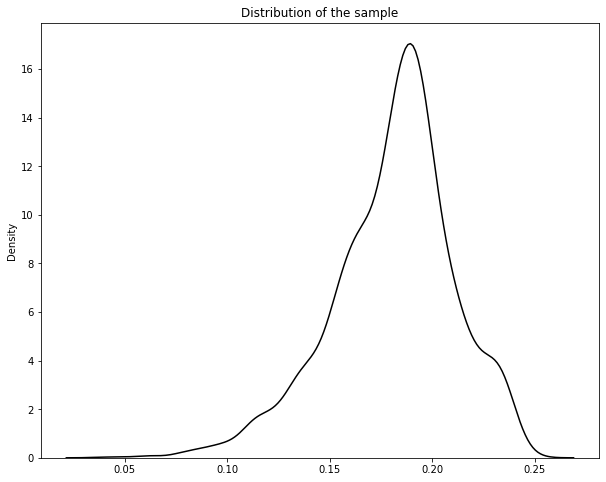

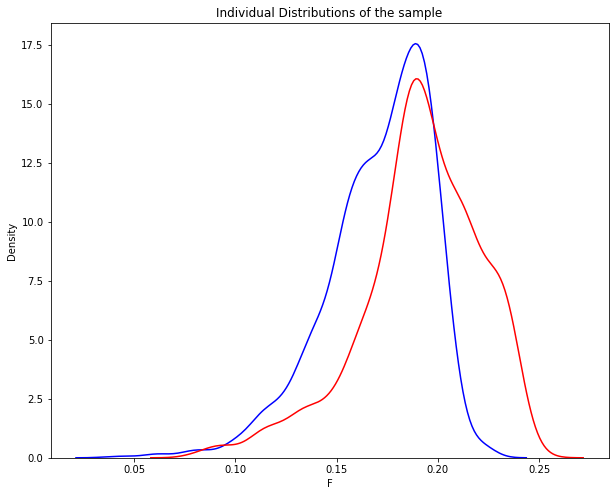

In [ ]:
x = np.concatenate([x1,x2])
n = x.size
#distribution graph
plt.figure(figsize=(10,8))
#plt.xlim([-0.25, 0.25])
#plt.ylim([-3, 3])
sns.distplot(x, hist=False, kde=True, bins=int(180/5), color = 'black')

plt.title('Distribution of the sample')

plt.figure(figsize=(10,8))
#plt.xlim([-0.25, 0.25])
#plt.ylim([-3, 3])
sns.distplot(x1, hist=False, kde=True, bins=int(180/5), color = 'blue')
sns.distplot(x2, hist=False, kde=True, bins=int(180/5), color = 'red')
plt.title('Individual Distributions of the sample')



In [ ]:
def EM(mu1,mu2,sig1,sig2,p1,p2,x):
  Q=[0]*n
  Q[1]=0
  Q[2]=sum(np.log(p1)+np.log(norm.pdf(x, mu1, sig1)) + np.log(p2)+np.log(norm.pdf(x, mu2, sig2)))
  i=2
  #Q function

  while abs((Q[i]-Q[i-1])/Q[i])>=pow(10,-12):
    
    num1 = p1*norm.pdf(x, mu1, sig1)
    num2 = p2*norm.pdf(x, mu2, sig2)
    den = num1+num2

    i = i+1
    Q[i] = sum(np.log(den))

    cond1 = num1/den
    cond2 = num2/den

    p1 = sum(cond1)/n
    p2 = sum(cond2)/n

    mu1 = sum(cond1*x)/sum(cond1)
    mu2 = sum(cond2*x)/sum(cond2)

    sig1 = math.sqrt(sum(cond1*(x-mu1)*(x-mu1))/sum(cond1))
    sig2 = math.sqrt(sum(cond2*(x-mu2)*(x-mu2))/sum(cond2))

  return [mu1,mu2,sig1,sig2,p1,p2,Q[i]]

In [ ]:
maxlist=[]


#mu1=random.uniform(-1, 0)
#mu2=random.uniform(-1, 0)
mu1=statistics.mean(x[1::2])
mu2 = statistics.mean(x[0::2]) 
#sig1=random.uniform(0, 0.001)
#sig2=random.uniform(0, 0.001)
sig1 = statistics.stdev(x[1::2])
sig2 = statistics.stdev(x[0::2])
p1=random.uniform(0,1)
p2=1-p1

list1=EM(mu1,mu2,sig1,sig2,p1,p2,x)
maxlist = list1


In [ ]:
print("Values obtained by EM Algorithm")
print("mu1 = ",maxlist[0])
print("mu2 = ",maxlist[1])
print("sig1 = ",maxlist[2])
print("sig2 = ",maxlist[3])
print("p1 = ",maxlist[4])
print("p2 = ",maxlist[5])

Values obtained by EM Algorithm
mu1 =  0.15052416718171352
mu2 =  0.1895703211594144
sig1 =  0.03221153570439393
sig2 =  0.022711076815394127
p1 =  0.22188384530009447
p2 =  0.7781161546999054


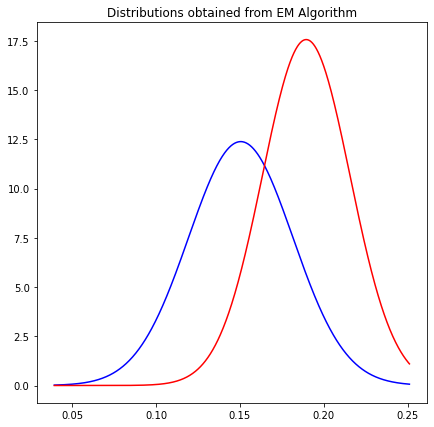

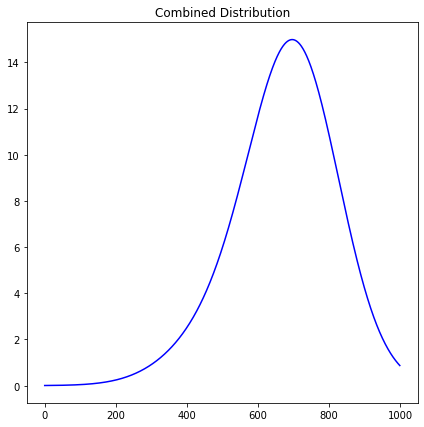

In [ ]:
x_=  np.linspace(min(x),max(x), num=1000)
g1=[0]*len(x_)
g2=[0]*len(x_)
g=[0]*len(x_)
i=0;
for pt in x_:
  g1[i]=(1/(maxlist[2]*math.sqrt(2*math.pi)))*math.exp((-1/2)*((pt-maxlist[0])/sig1)*((pt-maxlist[0])/maxlist[2]))
  g2[i]=(1/(maxlist[3]*math.sqrt(2*math.pi)))*math.exp((-1/2)*((pt-maxlist[1])/sig1)*((pt-maxlist[1])/maxlist[3]))
  g[i]=maxlist[4]*g1[i]+maxlist[5]*g2[i]
  i=i+1

plt.figure(figsize=(7,7))
plt.plot(x_,g1,color = 'blue')
plt.plot(x_,g2,color = 'red')
plt.title('Distributions obtained from EM Algorithm')
plt.show()


plt.figure(figsize=(7,7))
plt.plot(g,color = 'blue')
plt.title('Combined Distribution')
plt.show()


#### Conclusions:

*   As the sample data size is small the approximation is not that accurate
*   We are only considering one feature, i.e. the frequency of the voices, which may not be the only criteria to differentiate between male and female voices.
*   We are assuming that the sample contains the mixture of just 2 normal distributions, but that may be untrue.



####**Bivariate Failed Example**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import random
from scipy.stats import multivariate_normal

In [ ]:
url= 'https://raw.githubusercontent.com/hema410/Credit-card-fraud-dectection-using-EM/main/weight-height.csv'
df = pd.read_csv(url)
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [ ]:
print(df[df['Gender']=='Female'].count()[0])
print(df[df['Gender']=='Male'].count()[0])

5000
5000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

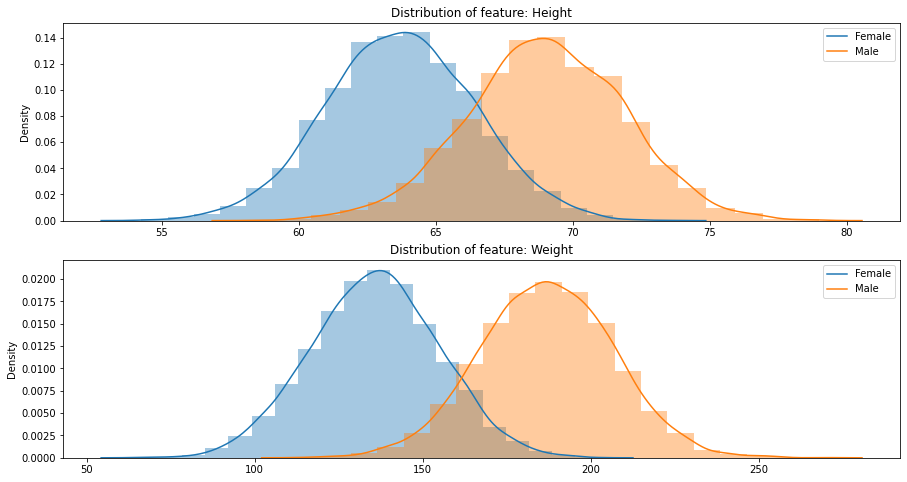

In [ ]:
import seaborn as sns
import matplotlib.gridspec as gridspec
features=['Height','Weight']
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(df[feat][df.Gender=='Female'], bins=20)
    sns.distplot(df[feat][df.Gender=='Male'],bins=20)
    ax.legend(['Female', 'Male'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

In [ ]:
#custom bivariate parameter estimation using expectation-maximization algorithm
d=df.drop(['Gender'],axis=1)
d=d.to_numpy()
m1 = random.choice(d)
m2 = random.choice(d)
cov1 = np.cov(np.transpose(d))
cov2 = np.cov(np.transpose(d))
pi = 0.5

In [ ]:
def Estep(lis1):
    m1=lis1[0]
    m2=lis1[1]
    cov1=lis1[2]
    cov2=lis1[3]
    pi=lis1[4]
    
    pt2 = multivariate_normal.pdf(d, mean=m2, cov=cov2)
    pt1 = multivariate_normal.pdf(d, mean=m1, cov=cov1)
    w1 = pi * pt2
    w2 = (1-pi) * pt1
    eval1 = w1/(w1+w2)

    return(eval1)

In [ ]:
def Mstep(eval1):
    num_mu1,din_mu1,num_mu2,din_mu2=0,0,0,0

    for i in range(0,len(d)):
        num_mu1 += (1-eval1[i]) * d[i]
        din_mu1 += (1-eval1[i])

        num_mu2 += eval1[i] * d[i]
        din_mu2 += eval1[i]

    mu1 = num_mu1/din_mu1
    mu2 = num_mu2/din_mu2

    num_s1,din_s1,num_s2,din_s2=0,0,0,0
    for i in range(0,len(d)):

        q1 = np.matrix(d[i]-mu1)
        num_s1 += (1-eval1[i]) * np.dot(q1.T, q1)
        din_s1 += (1-eval1[i])

        q2 = np.matrix(d[i]-mu2)
        num_s2 += eval1[i] * np.dot(q2.T, q2)
        din_s2 += eval1[i]

    s1 = num_s1/din_s1
    s2 = num_s2/din_s2

    pi = sum(eval1)/len(d)
    
    lis2=[mu1,mu2,s1,s2,pi]
    return(lis2)

In [ ]:
lis1=[m1,m2,cov1,cov2,pi]
P1=2;
P0=1;
import math
while ((P1-P0)/P0)>10^(-6):
    lis2 = Mstep(Estep(lis1))
    lis1=lis2
lis1